# **Importing Libraries and mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Tenserflow and Keras**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

# **Preprocess and analysis**

In [ ]:
IMAGE_SIZE = 331
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Train generator for train folder
train_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/car kaggle/car kaggle/Car_Brand_Logos/Train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

# Test generator for test folder
test_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/car kaggle/car kaggle/Car_Brand_Logos/Test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

Found 2899 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


# **Create the  VGG19 model**



In [ ]:
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( IMAGE_SIZE,IMAGE_SIZE, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('softmax'))
model.summary()

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 331, 331, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 331, 331, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 165, 165, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 165, 165, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 165, 165, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 82, 82, 128)       0         
                                                         

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 331, 331, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 331, 331, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 165, 165, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 165, 165, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 165, 165, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 82, 82, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 82, 82, 256)       2

# **Training the Keras Model**

In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])
model.save('my_model.keras')

Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 31.3346 - accuracy: 0.5243 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 727s 15s/step - loss: 31.3346 - accuracy: 0.5243 - val_loss: 2.0194 - val_accuracy: 0.8550
Epoch 2/10
46/46 [==============================] - 46s 1s/step - loss: 2.7582 - accuracy: 0.8103 - val_loss: 0.4396 - val_accuracy: 0.9450
Epoch 3/10
46/46 [==============================] - 43s 923ms/step - loss: 1.4734 - accuracy: 0.8893 - val_loss: 0.4884 - val_accuracy: 0.9550
Epoch 4/10
46/46 [==============================] - 43s 931ms/step - loss: 1.4441 - accuracy: 0.9096 - val_loss: 0.4780 - val_accuracy: 0.9700
Epoch 5/10
46/46 [==============================] - 48s 1s/step - loss: 1.0980 - accuracy: 0.9258 - val_loss: 0.3518 - val_accuracy: 0.9775
Epoch 6/10
46/46 [==============================] - 47s 1s/step - loss: 0.7127 - accuracy: 0.9376 - val_loss: 0.1019 - val_accuracy: 0.9875
Epoch 7/10
46/46 [==============================] - 56s 1s/step - loss: 1.1210 - accuracy: 0.9438 - val_loss: 0.0558 - val_accuracy: 0.9925
Epoch 8/10
46/46 [====

# **Loss and Accuracy Curves**

<ipython-input-6-c10fa02e1c14>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


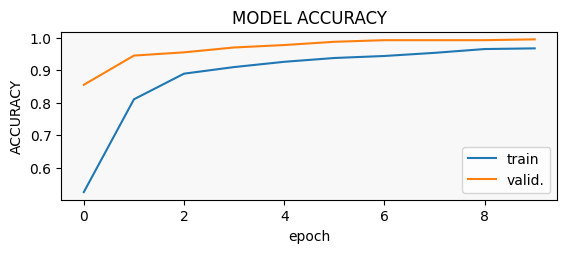

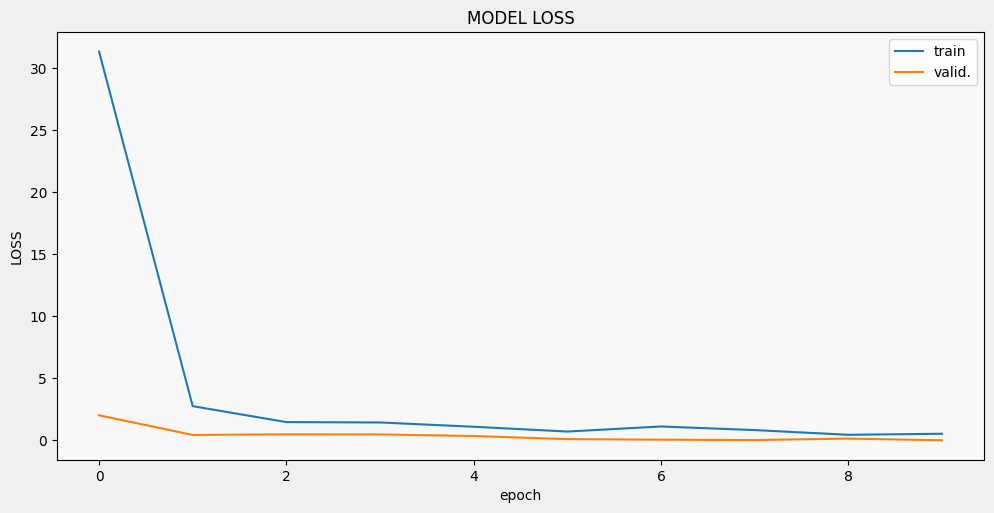

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)


display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


# **Accuracy**

In [ ]:
score = model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

7/7 [==============================] - 6s 721ms/step - loss: 0.0080 - accuracy: 0.9950
Accuracy: 99.50%
Loss:  0.008026844821870327


In [ ]:
score = model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

46/46 [==============================] - 38s 815ms/step - loss: 0.0445 - accuracy: 0.9941
Accuracy: 99.41%
Loss:  0.04445595294237137


# **Save The Model**



In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/car kaggle/model')

# **Reconstruct the model and check the predicted accuracy**

In [ ]:
reconstructed_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/car kaggle/model')
score = reconstructed_model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

score = reconstructed_model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

7/7 [==============================] - 6s 689ms/step - loss: 0.0080 - accuracy: 0.9950
Accuracy: 99.50%
Loss:  0.008026845753192902
46/46 [==============================] - 43s 928ms/step - loss: 0.0445 - accuracy: 0.9941
Accuracy: 99.41%
Loss:  0.044455938041210175


# **Test With Random Images**

In [ ]:
class_names=train_generator.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key

In [ ]:
labels

{0: 'hyundai',
 1: 'lexus',
 2: 'mazda',
 3: 'mercedes',
 4: 'opel',
 5: 'skoda',
 6: 'toyota',
 7: 'volkswagen'}

# **Predict for sample images**



In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)

  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(labels[np.argmax(result)])
  cv2_imshow(resized)

# **Downloading Sample Images**

In [ ]:
import urllib.request
#hyundai
urllib.request.urlretrieve("https://images.news18.com/ibnlive/uploads/2016/10/Hyundai-Logo.jpg?impolicy=website&width=510&height=356", "hyundai-1.jpg")
urllib.request.urlretrieve("https://media.gettyimages.com/id/1175391513/photo/a-sign-is-seen-at-a-hyundai-car-dealership-hyundai-and-kia.jpg?s=1024x1024&w=gi&k=20&c=-Bba0lQuAoW7V50ExPIYV0myZYqb-jDZzGDltU3KYE8=", "hyundai-2.jpg")

#lexus
urllib.request.urlretrieve("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAeFBMVEX///8AAAD29vaysrJ6enpHR0fGxsZ0dHQpKSn5+fmmpqZjY2NtbW3W1tbo6OhLS0uMjIw3Nzfw8PBfX1+dnZ28vLzi4uKSkpLPz8+srKy2trZQUFAiIiLk5OTc3NwTExOEhISPj48ZGRk+Pj4xMTFYWFgLCwsdHR0qW3nfAAAJyUlEQVR4nO2d22LiIBCG10NTE020qfFUtbGt9v3fcGs0BJjhnBqxfFe7FhV+YRhmgPz7FwgEAoFAIBAIBAKBQCAQCAQCN6Cf7dNVdCZNs7zr2twpi2I+fP3qAbZvw3mxj7uu3t2QJs8jqBLLabyM/nw/WyRHlU4Nn4uuq9sh6eykr1RFv+sqd0Q+f0dG23G4HESrfZbna0ys6OeNvemm67rfmHTM6/BUbvZMkRdErJ+XqzeWf8h+RZ+sBi/LFSizwDvW5vrPyR+xXykr1dMA7SaIVsufl4fkf5M/0Lv6E0aAuaDJU6jVsfpDXpIXZjesdicwdvulEBU7QK3e67/ljb2LblPpbug/0VKJmxohgzBr/pwSJ3Zyg0p3xIpuvLBX/WiKaMUqm5DXH9XQL6m2H2QFEa+Bt085mSUGv1jj7qBcq9FOVrCEWk1hKSJ9+TvV7RTKXJXSgpjBwsqRQf14hotyriTW6occ0Qo3TPnH9c9vv1HhDvlUtZyAGCyhWarLvrZd3U55JQ0/KRzvGdTqWVx6qi7iHY0CJ0WUZQW1+pKVr/vWvM3qdkrRtFyhFeZhSbtiXAd64FLcTyiTnSmKPkGtFEuarC73IHH6RgHVz7+EWkm91zN1t32MKbFZmqgMyx5q9aT+/DqM8QiufGOGEDecBTFYOoOrLttCZbvmmTRclW54hVqlOt8wuBYunevaNcQA99aKkkiKQtMh2F6Lq6aPu4cERkeKghnUStdm1zbed9e0cRtUUU0kK639LboD/c451O14URQcQq20DFbF/PqOpVtlu0a3YyFxGYOWkyHsVtmOIRqc5OViqJWqKzLU+2+8XvSQwaWY15DMl1FasHb9hy6V7RrSdPmsPodamfnjJFjhUtmOITl4aZgFS9UfDb+pfp/HyR7iZ8qN9QcUyzSGUDseKs/3jiEmS2p4Ea9BHqZHqH1fj40WibzLvEXEazCPqR+u7/y0r2zXkNZLyiBeg0Ugb63xTfcN0UG2yEM2lVps7SORa28DpsSxlqxwkViDMu6FQHwHbyMPJPJZCotgKVWbXWpErL267H2S1i0Q++9vUCurrBYRS3/1fWcQsYR79Aqo1bfVV/kv1k45DJGN8HZrYSKWdH/OPUMM0lhQIIFaiYoqIF3U3225dQtECS2olW2wkyzFrevaOT15EzZQK9s9C/Vyx87i3QVkrsP7C0zWK2KEYhxH8T1ANjyiQWXExzJeQF8hQR6Pd9MQs4uGaKDf8I4V04FskvA4rkzWO6iFh9tArHeHkk+wr2v3ED8KM1owjmVrcUgfNQ2w3hXEaGGBhAkQy7Zj1Pl7nwOllGONjUNELLtx2Pi23gZoKkgzkNDJAYrV630+GdPk0Tx2HM7IzkEgq2hHPJ4LzzRb2RAT37ZWRknse4TsZSvh35AtpE54f/ywcdMRq6W8/MII7zsW5U0hofV4K2u8Kd5GlBuaVBfmBBlcGKLC931/FQPSHCzzUrTWuW7esF+B+EFb9M8rJH1vgbfxZJbGfRCl5bNovSyHDpSJ3747RXPUy+N9Gzej2axWdl0VDxj+St+K51eSFj/0Dhgr7ZY55Iy0vxscBDTxmK+WUnvNTmh/c4UiKAfBNi2Bf97oYSZCCmpL8ti5fc12wcc6eU+gD4u7meSsWSV5nPuS06dud/i2H4tZc4TR300zGtCnAz7szunS1wU+xNpZTM7sXpuZLuj6CRUC2z5yt7oQMWGGr7m+j5SvmSM+Xqe9tNmwN5S+l4XaUcqjkg2rPpjTLqHg7t7snSbzSDQkF8WczzB+/I1eVbNHg1hP43KZrIsL62Q5HPOqnhl7n5gwp0Ay0mqm60d02HWIym8jpSYbz4+MO5IXJTbUAB+T9QNkb9pgV8yfp6L7zr9eZ4P0r449Mfl+VWySZHkhSTZRugsqBQKBQCAQCAQCgcANiI6vhKP9PXDZqhgMEgt0PjyZYSjDpdGAAt0j30+ZMkLqy5MG9ArfLre0mmlFWXBOyshLLvh0ZS6aiS7CpkVD5HFlOPXvwpy9tRBr57zLUZFURg4HX1AePnmmS/N7nZALzsTU/d9NrAy5ttaYqSQOE4u/wEUs9CF3Yurf00ks4zMSnyn6sjAFwZzvGe2ZU9X2YokGtpAWxIrNTdXXvxi5UUW0fTJjxBlwD7iwFgv/wWS4i4Vc8KvkfPkfcvUFvsXtQBeormhpRSyL02jOYiG3t6upbkrcoQcF+MOuzI1tx4uWbYgFHpPxOlExrutmKxbQamhwkyM6gzLHWPuMYa9tWgticePh3Wjrk6VY4FIGs0QV9tgm2uViJvamVi2IxfpWhifQLcXi/TnTTbC4nb/ahpQepyfK93YXi30QmeklcHZi8Q+gtdhcjdr5s8sVM40s6fc4i8UNQtNEm5VY/IRitbMTt/MrpkJbySOAbcRif2TjfUtWYvEtNP3SK8qVEr+wdxXLsWNZiQXWVYXW2h1OPKidJ7yALVuuYrErDo3n1HDYiCVtoqTx8JP6qJ2/gIxtV7HYaWk0VlNu6KnLQix5fxCD/pKonT8XxuZXR7F2PRuOzUZfC7GQ54BqgXf7HbpHCw9DOooljPYoIO6yhVi2oT6RjUDtPOpZO4qFPDxRj21sLVZ+ITYdjkKDGmEhS6wujmLx3qE+39Zi/UPeqYNYLNTjGkFP11Es5ImAukzcxDKKy1YIHs7QF17uAG7dchRLMvUqSYFYBvdXwVnsrchjOZof1MD/eI5ixUURrQDRKt0DCv5BulV6hMnu6F/UDx+eancf0+ILfBDNlnUgmBYoIwbShIWSZ7Ym1SqFtdK6W6fBw1M/7DZds14IZueZWZER60P14W5i8YGVc2dgn+OifKrnFWBmrLRif6hRis7t9FBkv1b1nY5iHZBfjX1JL4YHnAaLJynwhr0KAWC5hG0zK07gOyQ4isWlrqomcv64llq8obG5jZU17OO6m2C+EPkpuPorupajWNwzuarQNh8g1tjvAKy7+R6JPaP3N3XOEnPf6lmai6ON5PFZN7H4elz6NzAUz5tVKmMPssSzyBC2O7PxhZyftXvEQQXPnTnIsiTMMspQrD6fP67vyJbP3r/OGPQPLNF9GYpIMv9lKuCNWRe8j0yAi3vyg7Z7954Z75h/htn5alZEnsF2IxqPGnm+4I0QRe+Rw4jVrGi+yGoH2t3rqA5vYguNJdnPQ9E6zOIE+3yXfjuXyZkhvdkB2+pyHoq2cVoXgEcXr288GD9ViVnEzldDcXPjik7Rs+5xNJ847Hg0QyPXuEceE1n1xn4xO2rvcXTjbSm/qSPu34AWTl32swVwAfeLXaYgV9UsHAgNBAKBQCAQCAQCgUAgEAgE/hj/AdyQhnaNg4ZaAAAAAElFTkSuQmCC", "lexus-1.jpg")
urllib.request.urlretrieve("https://media.gettyimages.com/id/631407934/photo/us-economy-auto.jpg?s=594x594&w=gi&k=20&c=9jPmROOP4YOs0UaOEy3wPFKrVEJYfui0heYgPm9-N_k=", "lexus-2.jpg")

#mazda
urllib.request.urlretrieve("https://www.shutterstock.com/image-photo/bangkokthailand-may-222014-logo-brand-260nw-204080434.jpg","mazda-1.jpg")
urllib.request.urlretrieve("https://www.schoolphotoproject.com/_picture-of-cars-motorbikes/car-mazda-logo-photo-l.jpg","mazda-2.jpg")


#mercedes
urllib.request.urlretrieve("https://images.newindianexpress.com/uploads/user/imagelibrary/2021/12/2/w900X450/Mercedes_Benz_AP.jpg?w=400&dpr=2.6","mercedes-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ854tdVSiZLeBxVSjW-zdtGnHAA67yu2N06w&usqp=CAU","mercedes-2.jpg")

#opel
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQESUxbt7oUoBmKslA5YNh3b0NcXUojMM3Aeg&usqp=CAU","opel-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgyyB9T1otFMlgiMojMr3GE03fFoEsU6reQA&usqp=CAU","opel-2.jpg")


#skoda
urllib.request.urlretrieve("https://thumbs.dreamstime.com/b/bordeaux-aquitaine-france-skoda-logo-brand-car-dealership-text-sign-vehicle-store-showroom-shop-czech-bordeaux-aquitaine-france-219259318.jpg","skoda-1.jpg")
urllib.request.urlretrieve("https://media.gettyimages.com/id/1230550013/photo/a-skoda-logo-seen-on-a-parked-car-in-dublin-city-center-on-tuesday-january-11-in-dublin.jpg?s=612x612&w=gi&k=20&c=b8xHL2cUjvyQC1jGIVLqgglYVZGB7RGWqd5QV2VD5cw=","skoda-2.jpg")


#toyota
urllib.request.urlretrieve("https://us.123rf.com/450wm/engdao/engdao1904/engdao190400491/engdao190400491.jpg?ver=6","toyota-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLednVkQl--Dx9jOqUFk1t5EXfTkzyiiWPOw&usqp=CAU","toyota-2.jpg")

#volkswagen
urllib.request.urlretrieve("https://www.thedrive.com/content/2020/04/vw-logo-atlas.jpg?quality=85&crop=16%3A9&auto=webp&optimize=high&quality=70&width=1440","volkswagen-1.jpg")
urllib.request.urlretrieve("https://m.media-amazon.com/images/I/51SsqpaeYOL.jpg","volkswagen-2.jpg")


('volkswagen-2.jpg', <http.client.HTTPMessage at 0x7e141a0d0850>)

# **Classifying sample Images**

Original Dimensions :  (340, 510, 3)
1/1 [==============================] - 0s 29ms/step
hyundai


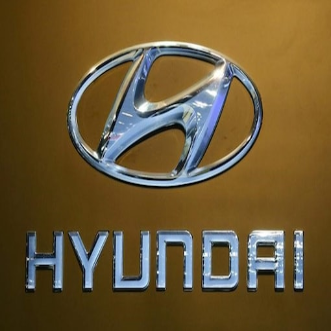

Original Dimensions :  (656, 1024, 3)
1/1 [==============================] - 0s 20ms/step
hyundai


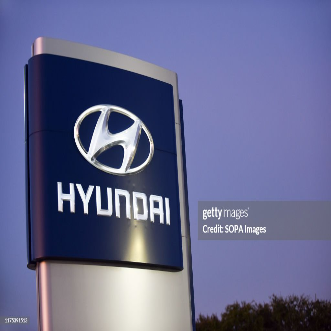

Original Dimensions :  (168, 300, 3)
1/1 [==============================] - 0s 27ms/step
lexus


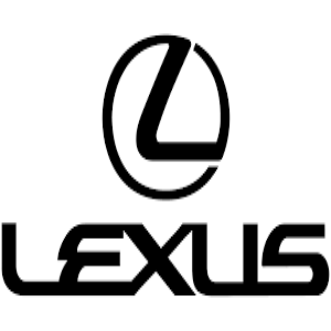

Original Dimensions :  (405, 594, 3)
1/1 [==============================] - 0s 24ms/step
lexus


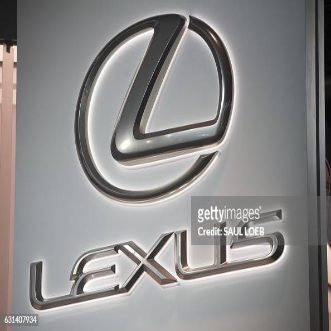

Original Dimensions :  (280, 390, 3)
1/1 [==============================] - 0s 22ms/step
mazda


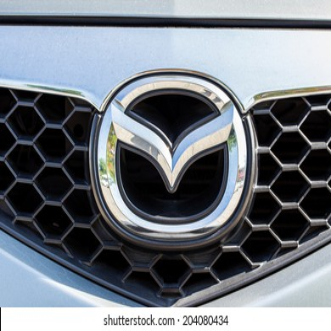

Original Dimensions :  (1704, 2272, 3)
1/1 [==============================] - 0s 25ms/step
mazda


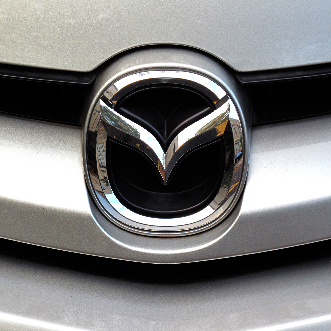

Original Dimensions :  (450, 900, 3)
1/1 [==============================] - 0s 31ms/step
mercedes


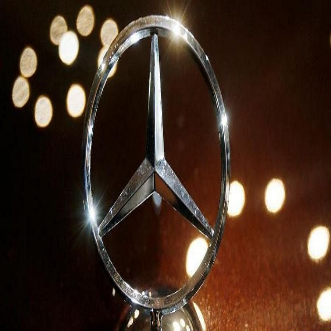

Original Dimensions :  (168, 300, 3)
1/1 [==============================] - 0s 24ms/step
mercedes


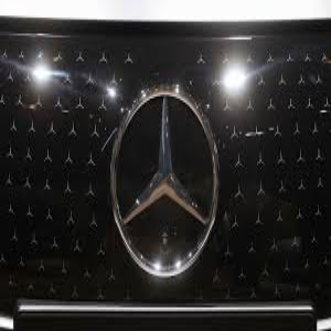

Original Dimensions :  (192, 263, 3)
1/1 [==============================] - 0s 26ms/step
opel


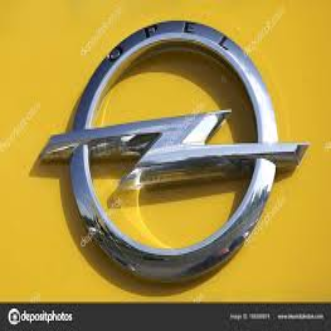

Original Dimensions :  (169, 299, 3)
1/1 [==============================] - 0s 40ms/step
opel


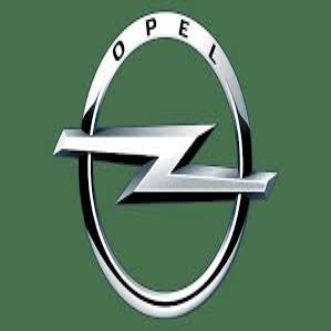

Original Dimensions :  (534, 800, 3)
1/1 [==============================] - 0s 38ms/step
skoda


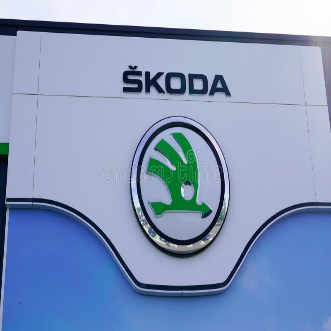

Original Dimensions :  (408, 612, 3)
1/1 [==============================] - 0s 66ms/step
skoda


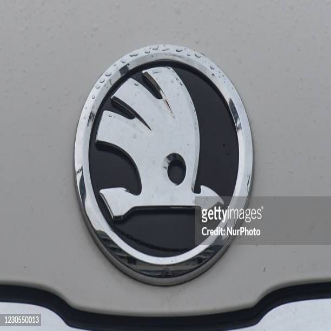

Original Dimensions :  (300, 450, 3)
1/1 [==============================] - 0s 27ms/step
toyota


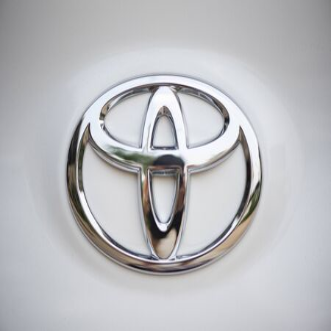

Original Dimensions :  (168, 299, 3)
1/1 [==============================] - 0s 28ms/step
toyota


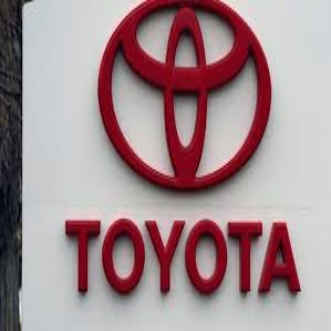

Original Dimensions :  (810, 1440, 3)
1/1 [==============================] - 0s 26ms/step
volkswagen


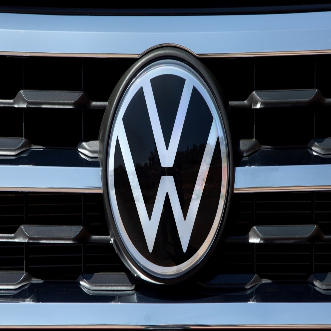

Original Dimensions :  (464, 500, 3)
1/1 [==============================] - 0s 29ms/step
volkswagen


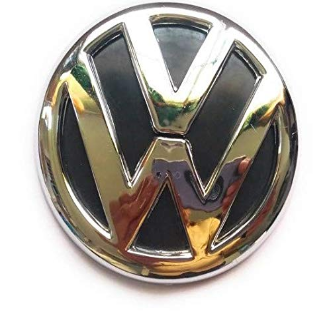

In [ ]:
GetResultForImage("hyundai-1.jpg")
GetResultForImage("hyundai-2.jpg")

GetResultForImage("lexus-1.jpg")
GetResultForImage("lexus-2.jpg")

GetResultForImage("mazda-1.jpg")
GetResultForImage("mazda-2.jpg")

GetResultForImage("mercedes-1.jpg")
GetResultForImage("mercedes-2.jpg")


GetResultForImage("opel-1.jpg")
GetResultForImage("opel-2.jpg")

GetResultForImage("skoda-1.jpg")
GetResultForImage("skoda-2.jpg")

GetResultForImage("toyota-1.jpg")
GetResultForImage("toyota-2.jpg")


GetResultForImage("volkswagen-1.jpg")
GetResultForImage("volkswagen-2.jpg")